# OVERVIEW

In this assignment, you will perform a supervised text regression task. The data for the task will consist of student essays from The William and Flora Hewlett Foundation. The dataset was created to assist in the design of solutions for automated grading of student-written essays. You will use a subset of this dataset and predict the scores of the essays. You may not use external data to make predictions. 

You will be provided with `training_set_rel.tsv` which contain the text of the essay and the score of each essay.



# PART 1: SETUP

### Q0: Run the following code! 
    
For reproducibility purposes, you will set the random seeds for NumPy and TensorFlow as 1234.  This way, all random steps will produce the same answers.


In [22]:
from numpy.random import seed

import tensorflow as tf

seed(1234)

tf.random.set_seed(seed = 1234)


### Q1: Load the data

We will use data from the [automated essay scoring task](https://www.kaggle.com/c/asap-aes) on Kaggle.

We will only use the training data, which we have provided for you -- you don't need to download anything from Kaggle.

Access the file `training_set_rel.tsv` as provided.  

Use the pandas function `read_csv`, with the parameter `sep=\t` because this is a tab-separated value file (tsv) and `encoding=latin`. 

The columns are described on the [Kaggle site](https://www.kaggle.com/competitions/asap-aes/data)

We will use three columns: `essay`, `essay_set`, and `domain1_score`.

Create a new dataframe with only these three columns, and rename `domain1_score` to just `score`.

Display this dataframe.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [23]:
import os
import pandas as pd

# loading the data into the df 
df = pd.read_csv('training_set_rel.tsv', sep='\t', encoding='latin')

# keeping only the cols we need
df = df[['essay', 'essay_set', 'domain1_score']].rename(columns={'domain1_score': 'score'})

# Display the DataFrame
df

,essay,essay_set,score
0,"Dear local newspaper, I think effects computer...",1,8
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,9
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,7
3,"Dear Local Newspaper, @CAPS1 I have found that...",1,10
4,"Dear @LOCATION1, I know having computers has a...",1,8
...,...,...,...
12971,In most stories mothers and daughters are eit...,8,35
12972,I never understood the meaning laughter is th...,8,32
12973,"When you laugh, is @CAPS5 out of habit, or is ...",8,40
12974,Trippin' on fen...,8,40


### Q2: Select the data from a single essay set

There are 8 totally unrelated essay sets in this data.

Filter the data frame so we are only considering essay_set = 7

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [24]:
# filtering so the  'essay_set' col is == 7
df_filtered = df[df['essay_set'] == 7]

# displaying
df_filtered

,essay,essay_set,score
10684,Patience is when your waiting .I was patience ...,7,15
10685,"I am not a patience person, like I cant sit i...",7,13
10686,One day I was at basketball practice and I was...,7,15
10687,I going to write about a time when I went to t...,7,17
10688,It can be very hard for somebody to be patient...,7,13
...,...,...,...
12248,One time I was getting a cool @CAPS1 game it w...,7,12
12249,A patent person in my life is my mom. Aicason ...,7,16
12250,A time when someone else I know was patient wa...,7,19
12251,I hate weddings. I love when people get marrie...,7,22


### Q3: Plot the distribution of scores

Create a plot of a histogram of the scores in the training set.  Comment on what you see.  

One option is to use the seaborn histplot function.  If you use seaborn, you can use the parameter `bins` to set the bin locations if they look strange. The parameter accepts a list of explicit locations. If you want to center the bins on the tick marks, you cand do something like this:

    bins=np.arange(minv,maxv)-0.5
    
where minv and maxv are the mininmum and maximum value in the range, respectively.   This expression indicates the number of possible scores, and that the tick marks should be at the halfway mark of each bar.

You may use some other visualization library if you wish!   The goal is to inspect the distribution of scores.


## Graded Cell

This cell is worth 10% of the grade for this assignment.

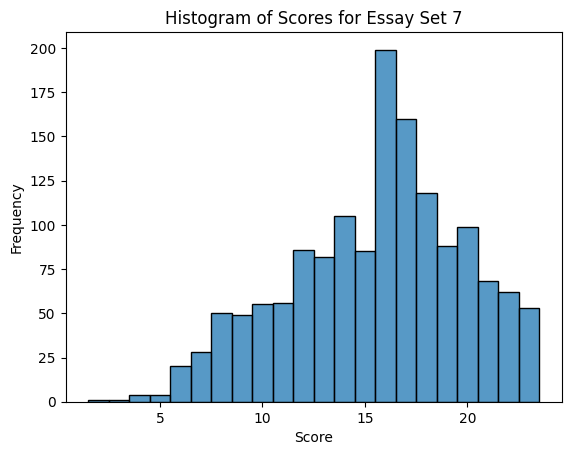

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# getting the min and max values
minv = df_filtered['score'].min()
maxv = df_filtered['score'].max()

# setting up bins
bins = np.arange(minv, maxv + 1) - 0.5

# making the histogram
sns.histplot(df_filtered['score'], bins=bins)

# titles and labels for the plot 
plt.title('Histogram of Scores for Essay Set 7')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### Q4: Create a test/train split

Use the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  Use the `test_size` parameter to control the size of the test set; use 0.2 to indicate a 20% split.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [26]:
from sklearn.model_selection import train_test_split

# splitting the data into X and y
X = df_filtered['essay']  
y = df_filtered['score']  

# splitting the data using 0.2 for the 20% split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Part 2: Conventional Representations

### Q5: Create vectors using term frequency

Use the `CountVectorizer` class from sklearn to create a vector for each essay.  We can't use text directly with machine learning; we need to create a vector of numbers first.  The CountVectorizer creates a vector with one position for each word in the corpus with a value of the number of occurrences of that word in the essay.

The vectorizer works like a model in sklearn: call the fit method on the essay data to "train" a model on the training set.  In this situation, we aren't really training anything, but we need a corpus to define the vectors -- only the words in the corpus we use will be represented in the vector.  

The fit method returns the trained model.  Now we can use the `transform` method to convert any text into a vector.

Call the transform method on the training essays and the test essays to create variables `xtrain` and `xtest`.


Report the number of dimensions for each vector; i.e., the number of terms in the corpus. 


## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# count vectorizer
vectorizer = CountVectorizer()

# getting the vocab from the training data
vectorizer.fit(X_train)

# transforming the training and test data
xtrain = vectorizer.transform(X_train)
xtest = vectorizer.transform(X_test)

# printing the number of dimensions
num_features = xtrain.shape[1]

print(f"The number of dimensions (terms in the corpus): {num_features}")

The number of dimensions (terms in the corpus): 8938


### Q6: Train a regression model using your vectors

Now that we have vectors, we can train a regression model to predict the essay score.

Use a [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) model from sklearn `linear_model` module.

Call the fit method on your training data xtrain and ytrain.

Then call the score method on your test data xtest and ytest.  The score method provides a default evaluation metric.  For the Ridge model, the score method returns $R^2$ which is called the coefficient of determination.  It tells you the proportion of the variation in the essay score is predictable from the essay text: higher is better.

Report the coefficient of determination.

## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [28]:
from sklearn.linear_model import Ridge

# ridge regression model
ridge_model = Ridge()

# fitting the model to the training data 
ridge_model.fit(xtrain, y_train)

# eval on the test data 
predicted_scores_conventional = ridge_model.predict(xtest)

print(f"Coefficient of Determination (R^2): {r2_score}")

Coefficient of Determination (R^2): 0.1538617220831563


### Q7: Plot the distribution of scores 

Plot a histogram of your predicted scores.

Plot another histogram of the ground truth scores, superimposed on the first (using seaborn, just call the function again.)

How is your model's distribution of scores different from the ground truth distribution?  Describe how they differ; what kind of mistakes is your model making?

## Graded Cell

This cell is worth 10% of the grade for this assignment.

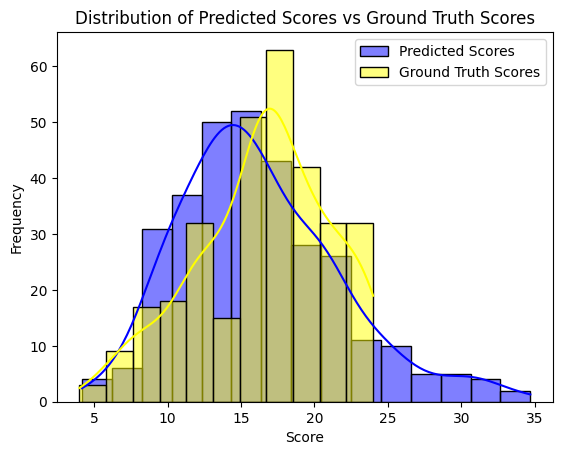

In [29]:
predicted_scores = ridge_model.predict(xtest)

# plotting the predicted scores
sns.histplot(predicted_scores, color='blue', label='Predicted Scores', kde=True)

# plotting the ground truth scores
sns.histplot(y_test, color='yellow', label='Ground Truth Scores', kde=True)

# plot title and labels
plt.title('Distribution of Predicted Scores vs Ground Truth Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Part 3: Neural Network Representations


For this part, we will implement a deep sentence embedder to replace the feature selection process. As a first step, choose your model from Part 2.

This time, you will obtain vectors by using a pre-trained neural network model called the Universal Sentence Encoder.  This model will produce a dense vector from any sequence of text. 

First, import the model with the following code.  This step will take considerable time -- it is downloading a large pre-trained model for the first time.


In [30]:
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(module_url)


### Q8: Generate embeddings

Next, you will embed the data with the imported model. The Universal Sentence Encoder takes a list of strings and generates an embedding (i.e., a vector) for each string. 

You can call the model you downloaded like a function. 

Generate a vector for each string in the training set; call this array xtrain.

Also generate a vector for each string in the test set; call this array xtest.

Notice how long this step takes -- it's a big model.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [31]:
## I think that this is what you are looking for???? 

# generate embeddings
xtrain_embedded = model(X_train)
xtest_embedded = model(X_test)

# converting to arrays
xtrain = xtrain_embedded.numpy()
xtest = xtest_embedded.numpy()

### Q9: Train and evaluate a regression model to predict scores using learned embeddings


Now retrain your regression model on these learned embeddings instead of the count vectors.

Use the vanilla Ridge model.  Report the score. 

Which model appears to perform the best?

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [32]:
from sklearn.linear_model import Ridge

# regression model
ridge_model_embedded = Ridge()

# fit the embeded data 
ridge_model_embedded.fit(xtrain, y_train)

# eval on the test data and print r2 score
r2_score_embedded = ridge_model_embedded.score(xtest, y_test)

print({r2_score_embedded})

{0.6285791491685161}


### Q10: Plot the distribution of scores

Once again, plot a histogram of your predicted scores from your new model.

Plot another histogram of the ground truth scores.

How is your new model's distribution of scores different from the ground truth distribution? Is it doing better than your earlier models?  How is it doing better?


## Graded Cell

This cell is worth 5% of the grade for this assignment.

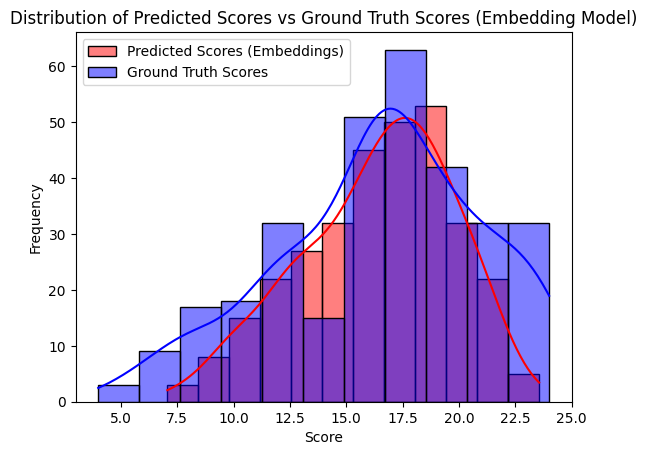

In [33]:
# getting the predicted scores
predicted_scores_embedded = ridge_model_embedded.predict(xtest)

# predicted scores histogram
sns.histplot(predicted_scores_embedded, color='red', label='Predicted Scores (Embeddings)', kde=True)

# ground truth scores histogram 
sns.histplot(y_test, color='blue', label='Ground Truth Scores', kde=True)

# titles and labels for the plot
plt.title('Distribution of Predicted Scores vs Ground Truth Scores (Embedding Model)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### The model is doing better than the earlier models. The distribution of scores is more similar to the ground truth distribution. The model is doing better because it is using a pre-trained model to generate the vectors, which is more accurate than the previous models. On top of that the skewness of the distribution is doing a lot better as well, and the model does need some imporvement, but it is doing really good. 

### Q11: Plot the errors

We will analyze the difference between the neural model and your best conventional model.

Plot the distribution of errors -- see where the two models made mistakes.

The errors are your model's predicted score minus the ground truth human score.

Plot a boxplot of the errors for your model using the universal sentence encoder.  Use the seaborn histplot function. 

x will be the ground truth scores and y is the difference between ground truth and your predictions.  

## Graded Cell

This cell is worth 5% of the grade for this assignment.

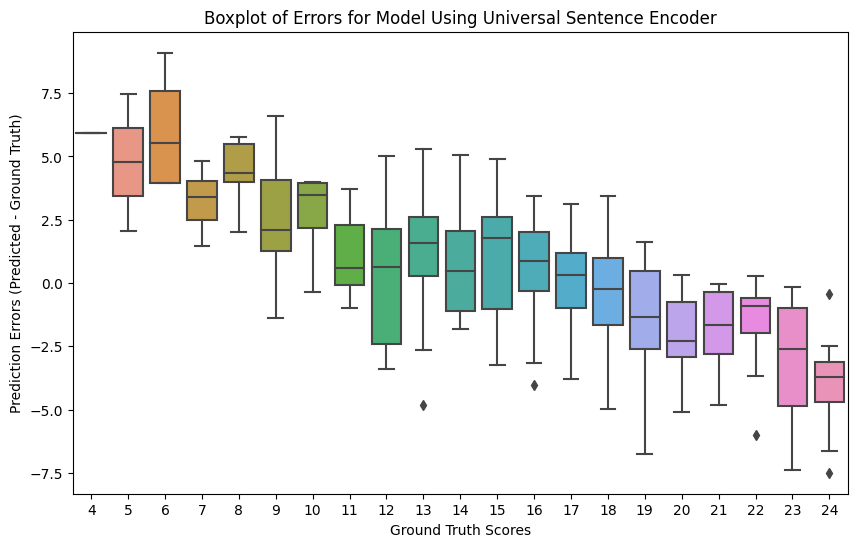

In [34]:
# calculating the errors
errors = predicted_scores_embedded - y_test

# prepping the data 
data_for_plot = pd.DataFrame({
    'Ground Truth Scores': y_test,
    'Errors': errors
})

# making the box plot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ground Truth Scores', y='Errors', data=data_for_plot)

# titles and labels 
plt.title('Boxplot of Errors for Model Using Universal Sentence Encoder')
plt.xlabel('Ground Truth Scores')
plt.ylabel('Prediction Errors (Predicted - Ground Truth)')
plt.show()

### Q12: Compare models directly

Plot a histogram of the difference between your neural model and the ground truth.

Plot another histogram of the difference between your best conventional model and the ground truth.

Does either model tend to overestimate or underestimate the true score?

## Graded Cell

This cell is worth 10% of the grade for this assignment.

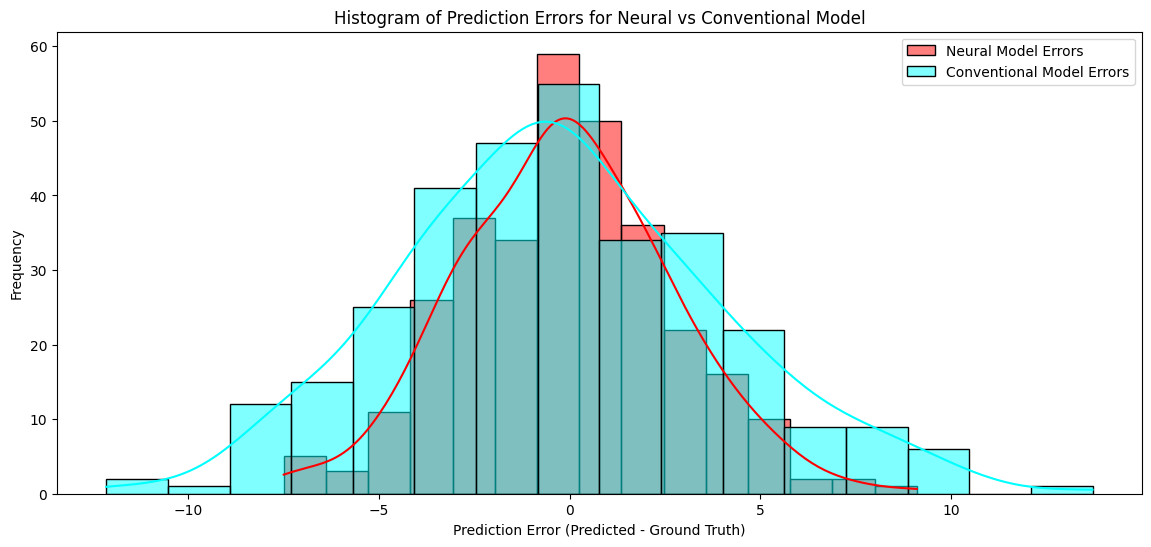

In [35]:
errors_neural = predicted_scores_embedded - y_test

errors_conventional = predicted_scores_conventional - y_test

# fig size 
plt.figure(figsize=(14, 6))

# histogram of errors for the neural model
sns.histplot(errors_neural, color='red', label='Neural Model Errors', kde=True)

# histogram of errors for the conventional model
sns.histplot(errors_conventional, color='cyan', label='Conventional Model Errors', kde=True)

# titles and labels
plt.title('Histogram of Prediction Errors for Neural vs Conventional Model')
plt.xlabel('Prediction Error (Predicted - Ground Truth)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Answer the questions here

### Q13: Summarize your findings

Summarize your results. Which approach worked best?  Why?  Does automatic essay scoring appear feasible? How might we improve on this model?


## Graded Cell

This cell is worth 15% of the grade for this assignment.

#### Write your answers to Q13 here:

The Spread of errors is both relatively the same. But it looks like the conventional model has a slightly wider spread. But when looking at the Skewness, neither one of the models seems to be highly skewed in any direction. And both models do have an even distribution of errors with the majority of the errors being around 0. But The conventional model does have a slightly higher number of errors that are greater than 0. But the neural model does have a slightly higher number of errors that are less than 0. But overall both models are doing a really good job.